In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_training, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import keras
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [25]:
create_experiment_snapshots([25, 50, 75, 100])
evaluations = []

AssertionError: Not all first 15 nodes are in layer 0.

In [32]:
# Learning Parameters
epsilon = 1.0  # exploration rate
attacker_sensitivity = 1.0
# Simulator Settings
start_time = 0
finish_time = None
mtd_interval = 100
# scheme = 'mtd_ai'
scheme = 'None'
total_nodes = 74
new_network = True

# Batch settings
num_iterations = 500
attacker_sensitivity = 1.0

In [28]:
evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network, model_path = '../experiments/AI_model/models_joo_kai/main_network_parameter_set_8.h5')

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


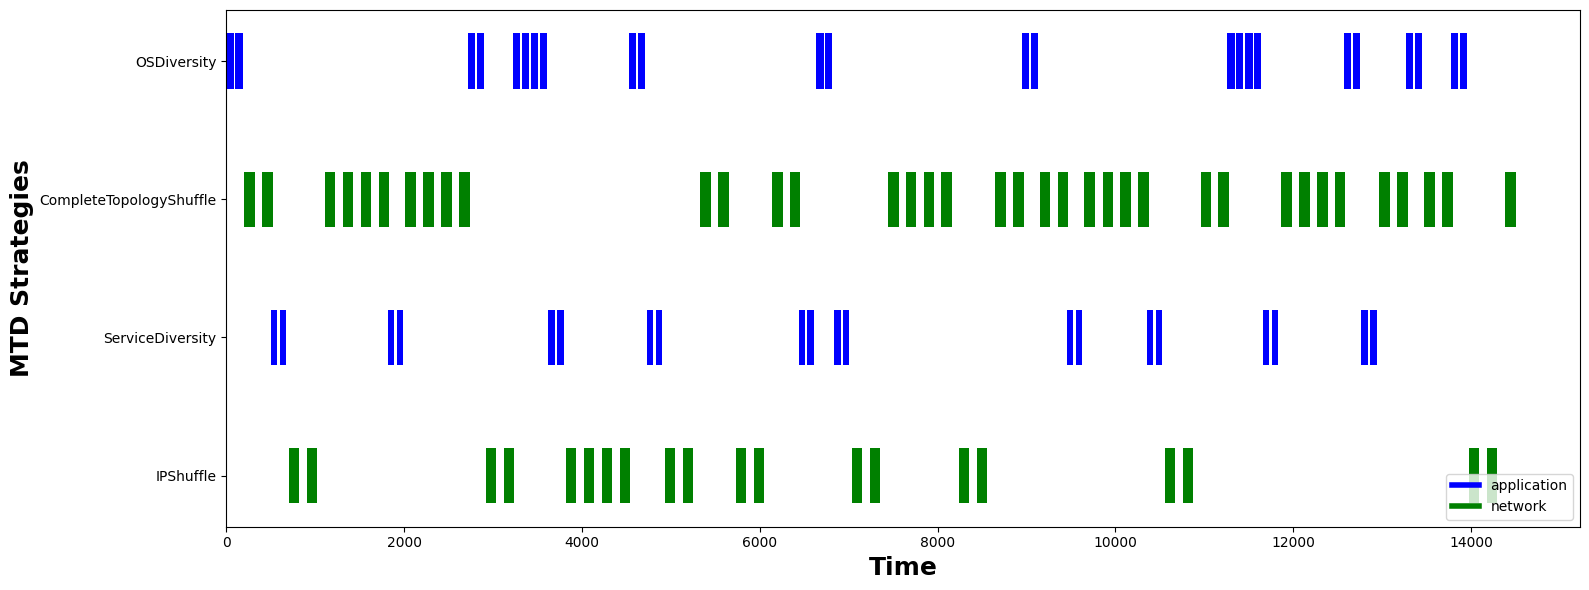

In [4]:
evaluation.visualise_mtd_operation()


In [5]:
# print(evaluation.security_metrics_record._metric_record)
evaluation.evaluation_result_by_compromise_checkpoint()

[{'time_to_compromise': 1789.1995931797858,
  'attack_success_rate': 0.6727272727272727,
  'host_compromise_ratio': 0.1,
  'mtd_execution_frequency': 0,
  'exposed_endpoints': 15,
  'attack_path_exposure': 0.8333333333333334,
  'roa': 0.5351975228960545,
  'shortest_path_variability': 0,
  'risk': 1.8247921787311427},
 {'time_to_compromise': 2176.292921510361,
  'attack_success_rate': 0.8222222222222223,
  'host_compromise_ratio': 0.2,
  'mtd_execution_frequency': 0,
  'exposed_endpoints': 15,
  'attack_path_exposure': 0.8333333333333334,
  'roa': 0.5351975228960545,
  'shortest_path_variability': 0,
  'risk': 1.8247921787311427},
 {'time_to_compromise': 3243.382924623653,
  'attack_success_rate': 0.8222222222222222,
  'host_compromise_ratio': 0.3,
  'mtd_execution_frequency': 0,
  'exposed_endpoints': 15,
  'attack_path_exposure': 0.8333333333333334,
  'roa': 0.5351975228960545,
  'shortest_path_variability': 0,
  'risk': 1.8247921787311427},
 {'time_to_compromise': 3627.415544222582,

In [5]:
# evaluation.visualize_attack_path_exposure_score()

evaluation.get_simulation_summary_metrics()

{'Total Time of Simulation (Time to Compromise)': 14535.857526400201,
 'Attack Success Rate': 0.5815899581589958,
 'Number of Attacks MTD Stopped': 100,
 'Total Number of Attacks': 239,
 'MTD Execution Frequency': 0.0069653019387177165,
 'Mean Time to Compromise': 259.5688844000036}

In [20]:
# evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)

In [33]:

scheme = ["mtd_ai", "random", "simultaneous", "alternative", "None"]
resultsPerScheme = []
compromiseCheckpointSchemes=[]
for schemes in scheme:
    compromsieCheckpoint = []
    results = []
    for i in range(num_iterations):
        evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=schemes, total_nodes=total_nodes, 
                                    new_network=new_network, attacker_sensitivity=attacker_sensitivity, model_path = '../experiments/AI_model/models_joo_kai/main_network_parameter_set_8.h5')
        results.append(evaluation.get_simulation_summary_metrics())
        compromsieCheckpoint.append(evaluation.evaluation_result_by_compromise_checkpoint())
    # evaluation.visualise_simulation_sim_metrics(results, schemes)
    resultsPerScheme.append(results)
    compromiseCheckpointSchemes.append(compromsieCheckpoint)

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metri

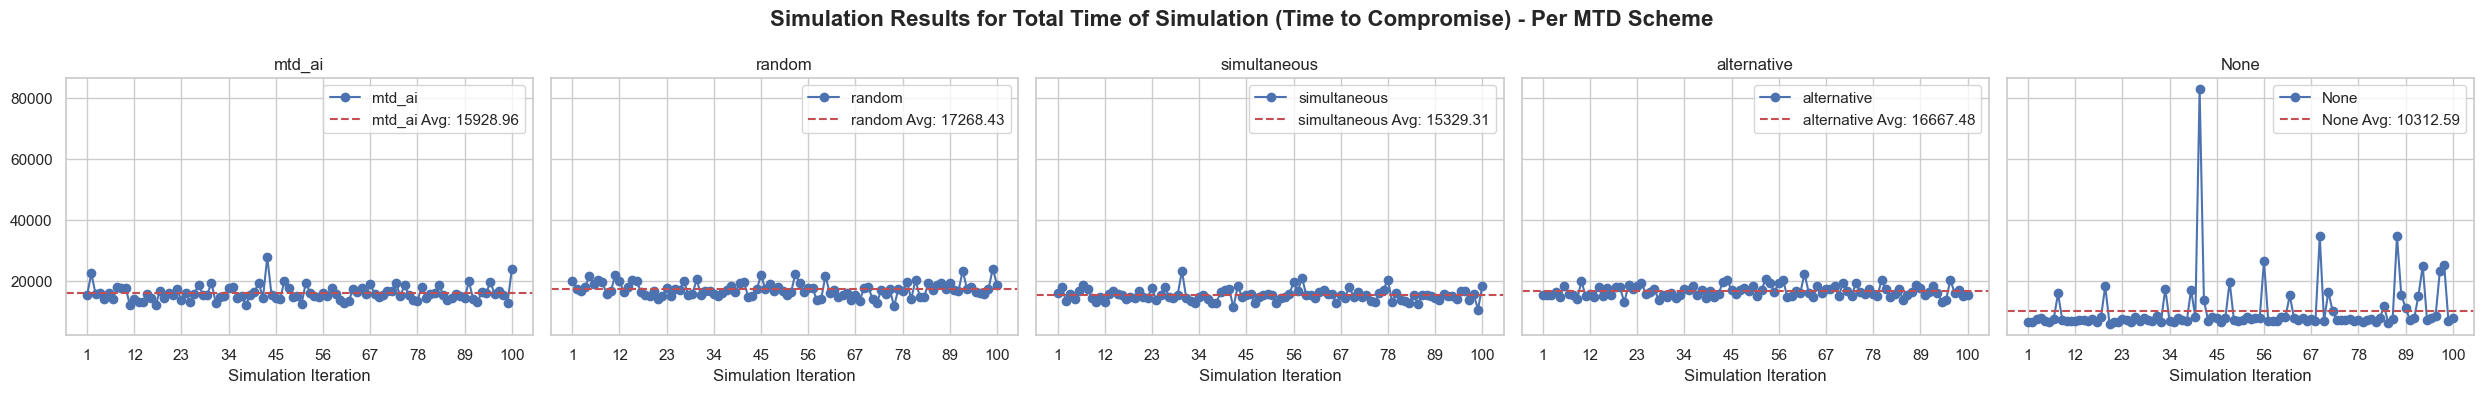

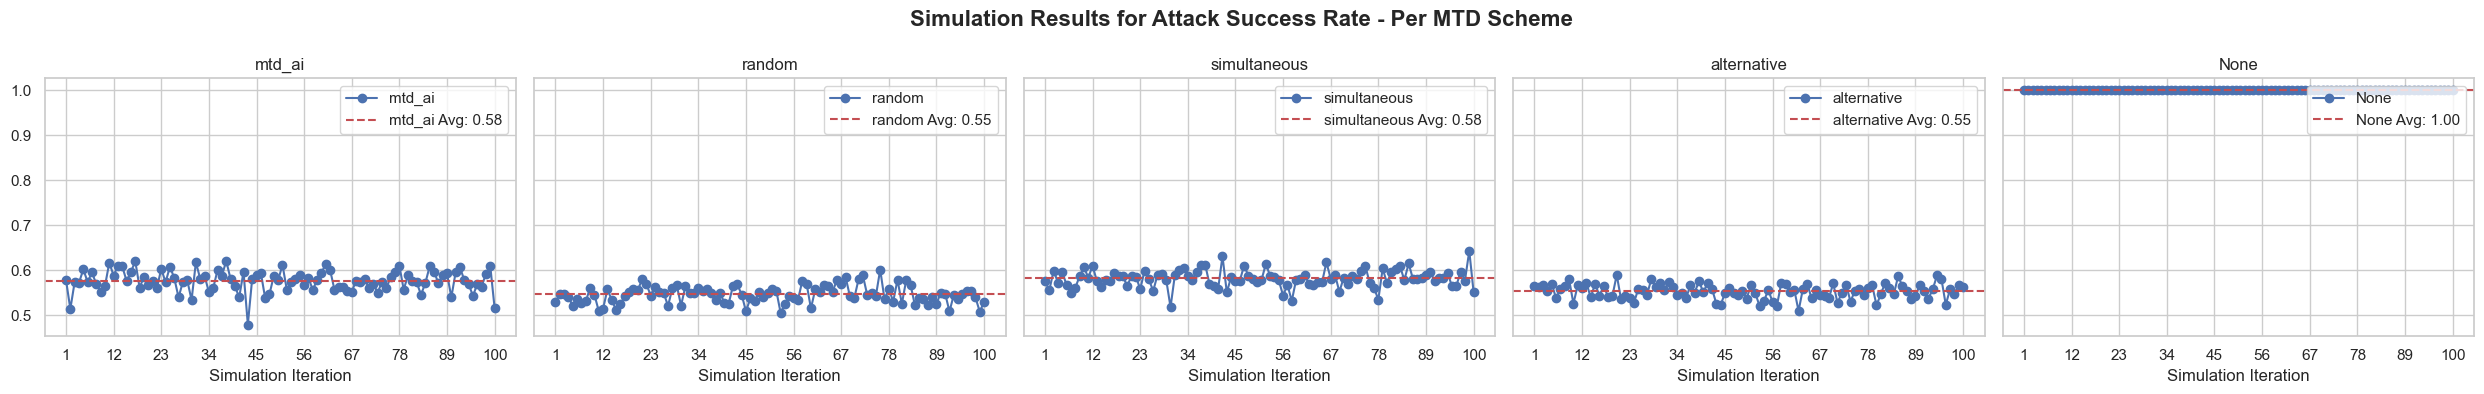

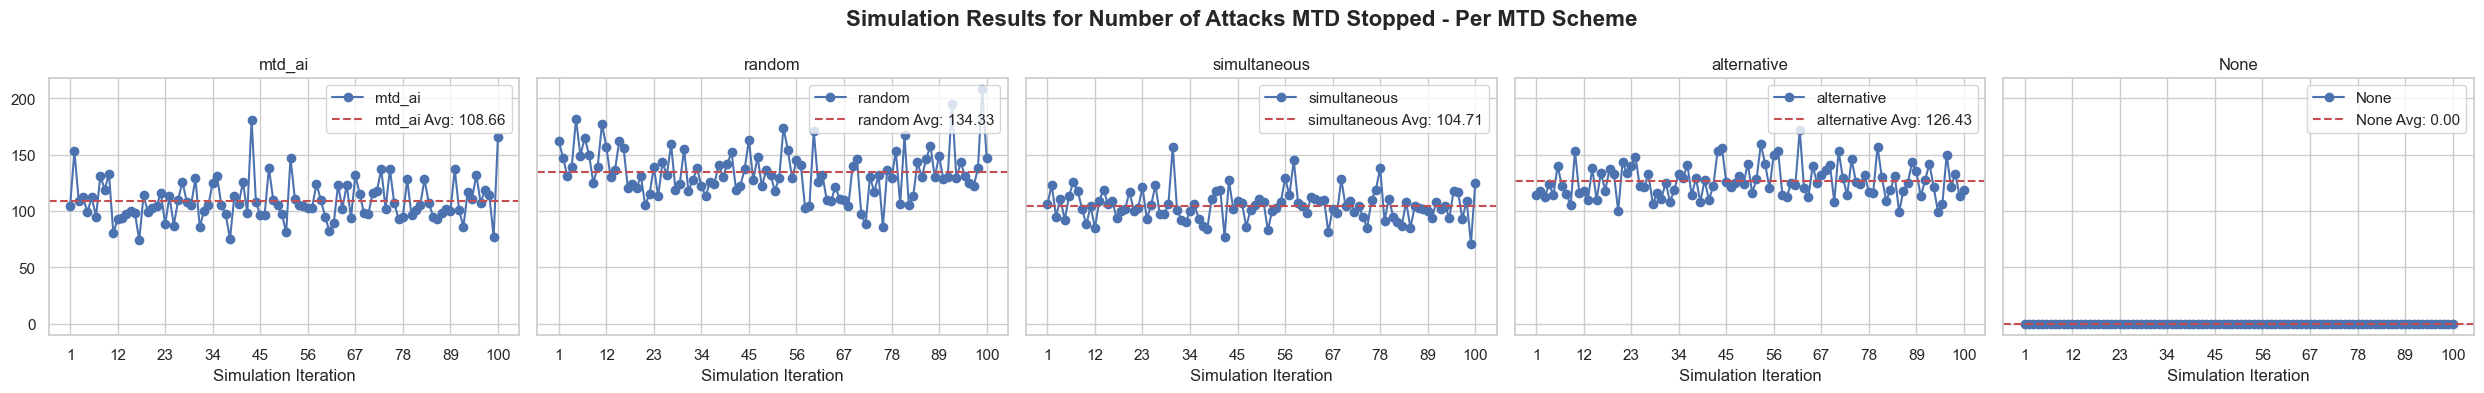

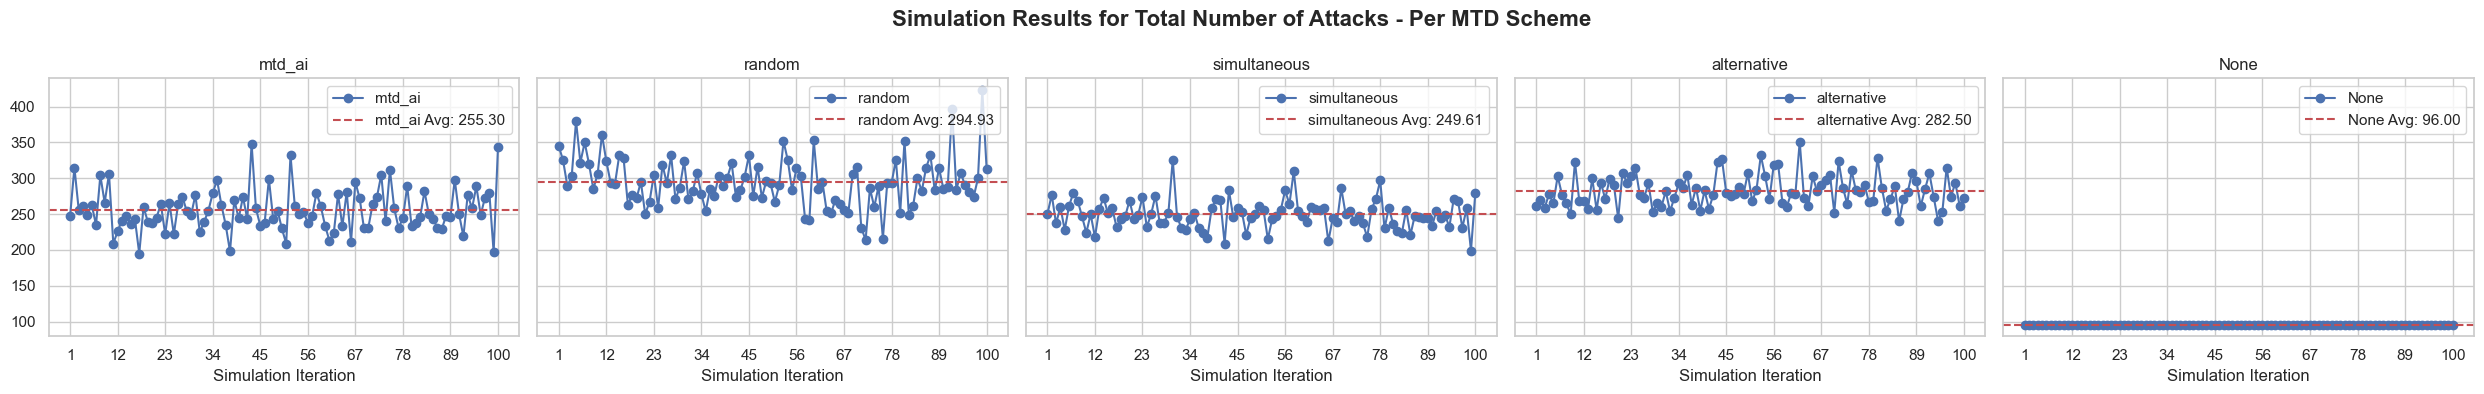

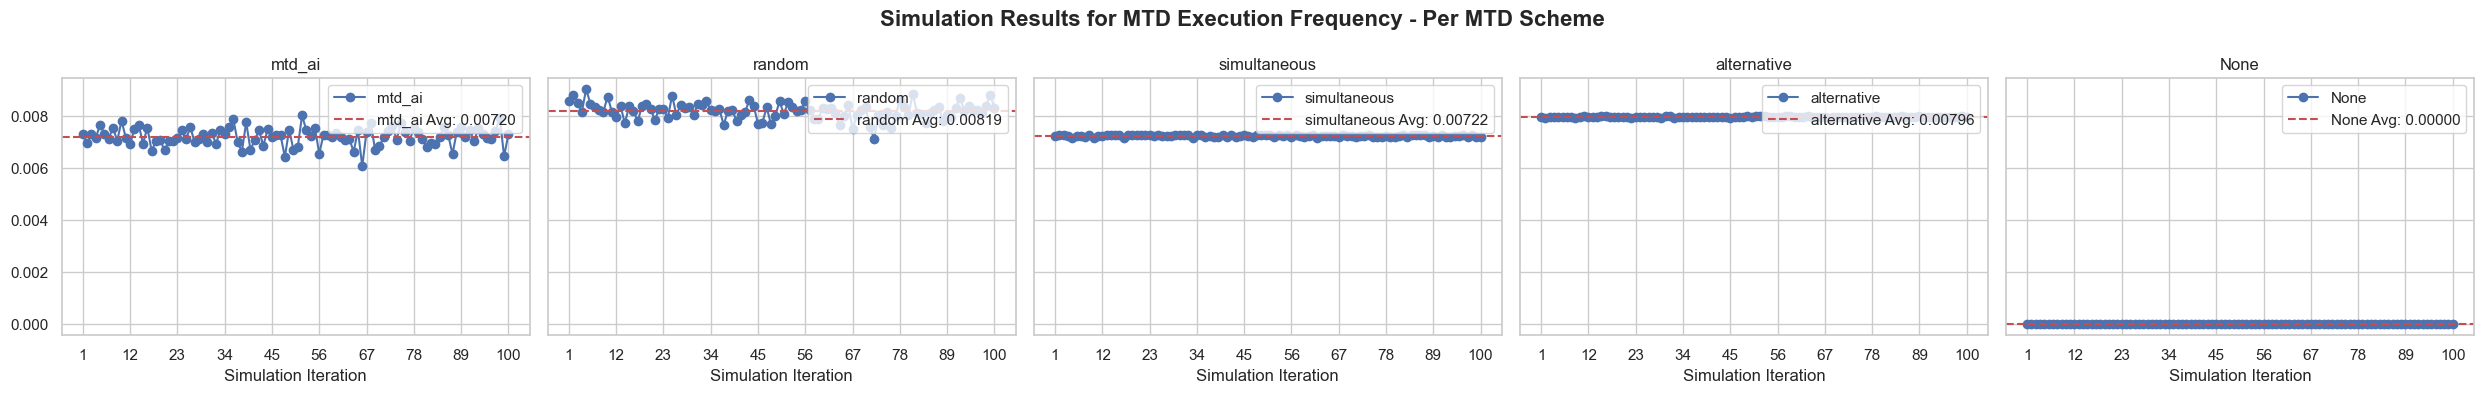

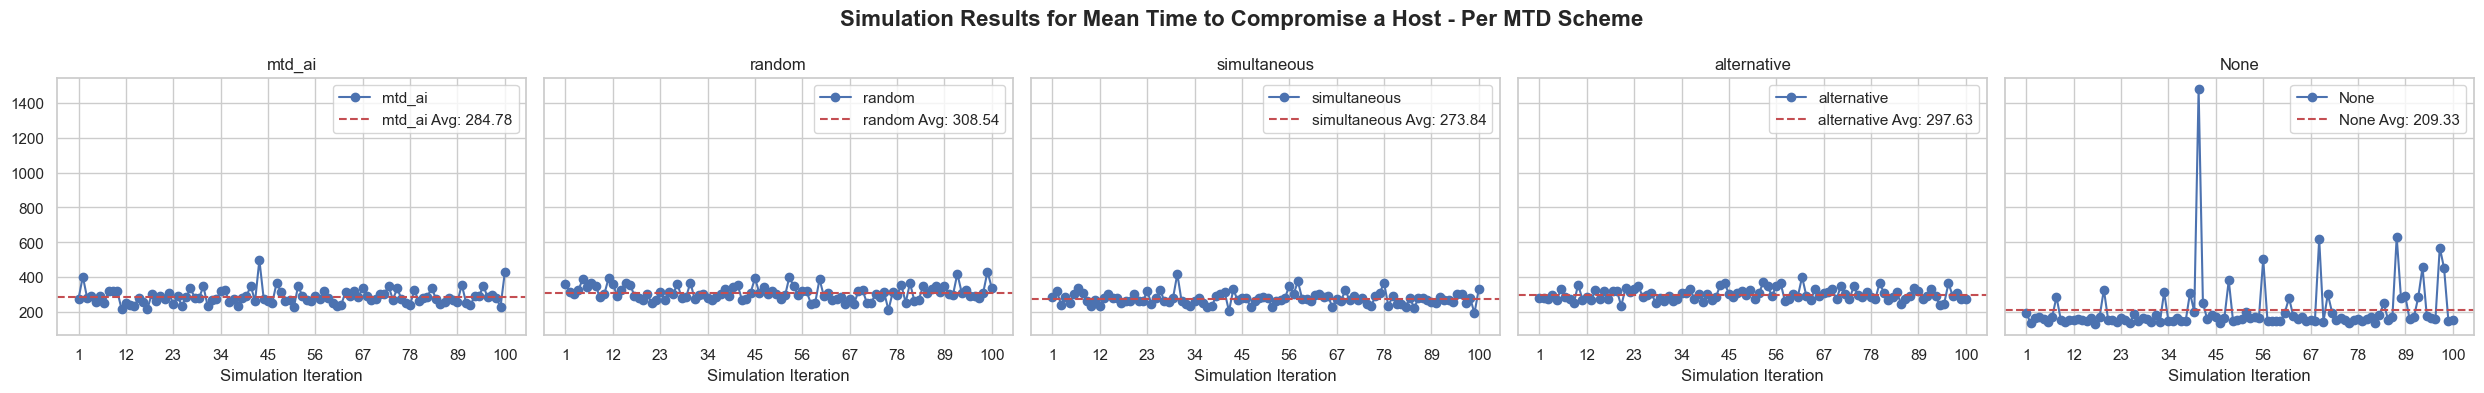

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

scheme = ["mtd_ai", "random", "simultaneous", "alternative", "None"]
# Setup the style
sns.set(style="whitegrid")

# Assumed num_iterations might vary, define it as needed

# Get number of schemes
num_schemes = len(scheme)


# Define the ticks for the x-axis
x_ticks = np.linspace(1, num_iterations, min(10, num_iterations), dtype=int)

# Iterate over each metric to create a separate figure for each
metrics = ['Total Time of Simulation (Time to Compromise)', 'Attack Success Rate', 'Number of Attacks MTD Stopped', 'Total Number of Attacks', 'MTD Execution Frequency', 'Mean Time to Compromise']

for metric in metrics:
    fig, axes = plt.subplots(1, num_schemes, figsize=(5 * num_schemes, 4), sharey='row')
    if metric == 'Mean Time to Compromise':
        fig.suptitle(f'Simulation Results for {metric} a Host - Per MTD Scheme', fontsize=16, weight='bold')
    else:
        fig.suptitle(f'Simulation Results for {metric} - Per MTD Scheme', fontsize=16, weight='bold')

    # Plot each scheme's results in a subplot
    for i, results in enumerate(resultsPerScheme):
        # Convert the list of dictionaries to a DataFrame
        df = pd.DataFrame(results)
        
        # Ensure that the number of data points matches num_iterations
        if len(df[metric]) == num_iterations:
            axes[i].plot(range(1, num_iterations + 1), df[metric], marker='o', label=scheme[i])
            
            # Add the mean line
            avg_value = df[metric].mean()
            if metric == 'MTD Execution Frequency':
                axes[i].axhline(y=avg_value, color='r', linestyle='--', label=f'{scheme[i]} Avg: {avg_value:.5f}')
            else:
                axes[i].axhline(y=avg_value, color='r', linestyle='--', label=f'{scheme[i]} Avg: {avg_value:.2f}')

            
            # Label the axes and title
            axes[i].set_title(scheme[i])
            axes[i].set_xlabel('Simulation Iteration')
            
            # Set the x-ticks adaptively
            axes[i].set_xticks(x_ticks)
            axes[i].legend(loc='upper right')
        else:
            print(f"Skipping {scheme[i]} for metric {metric} due to mismatched lengths.")
            continue

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(f'{metric.replace(" ", "_").lower()}.png')  # Saving the figure as a PNG file
    plt.show()

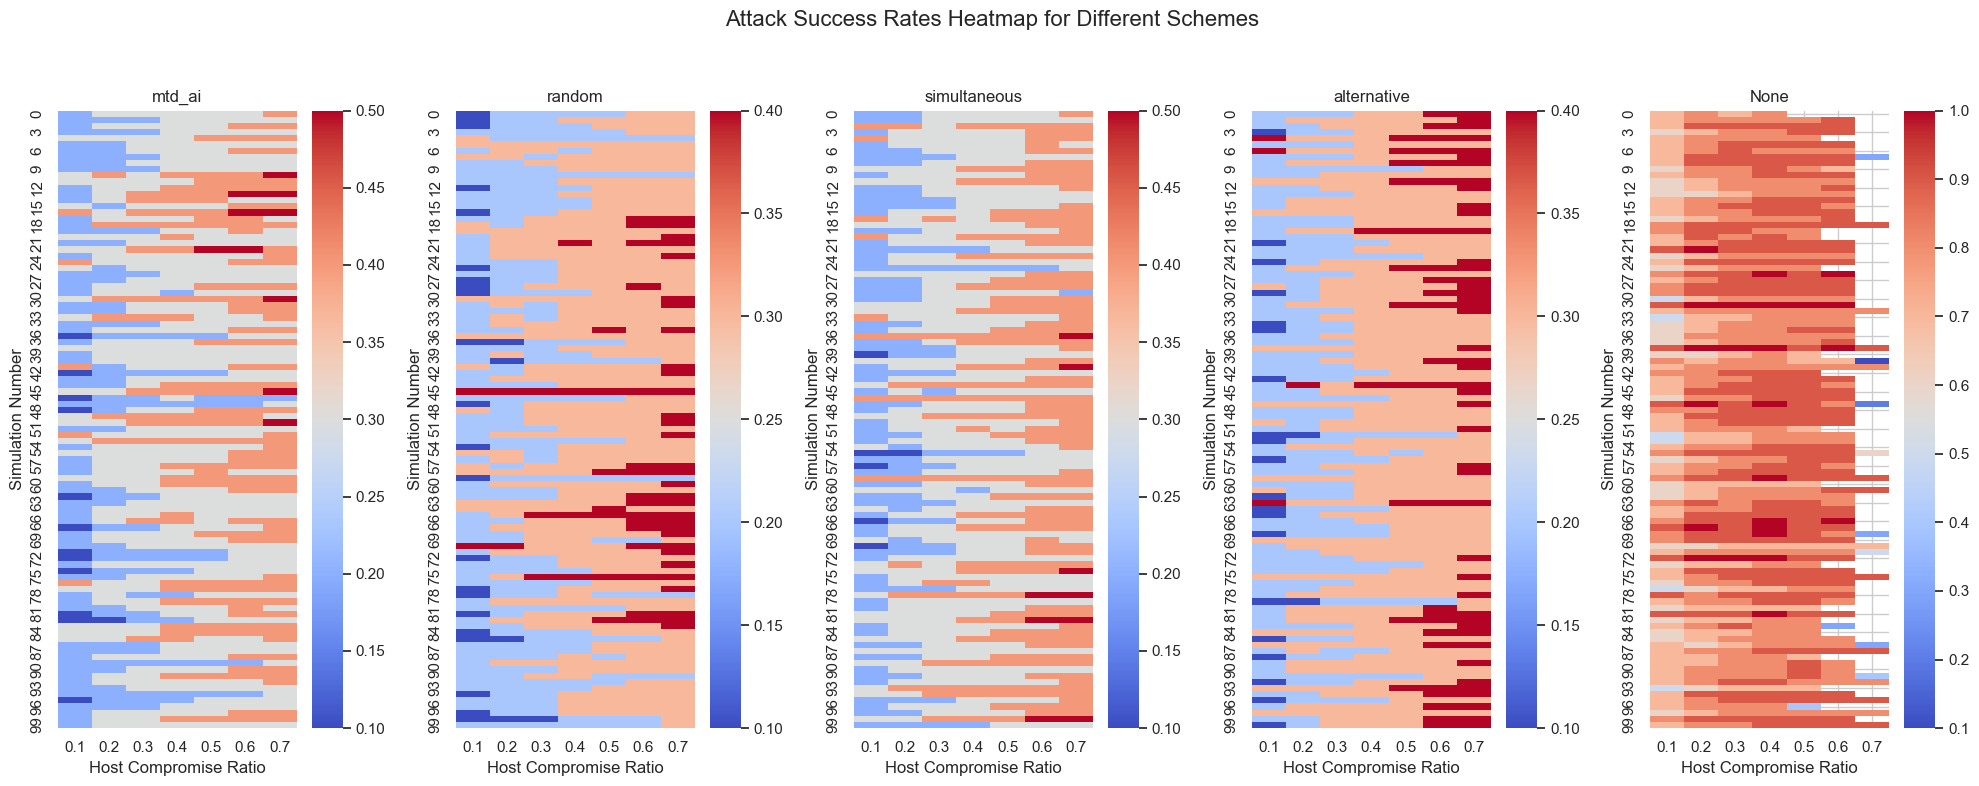

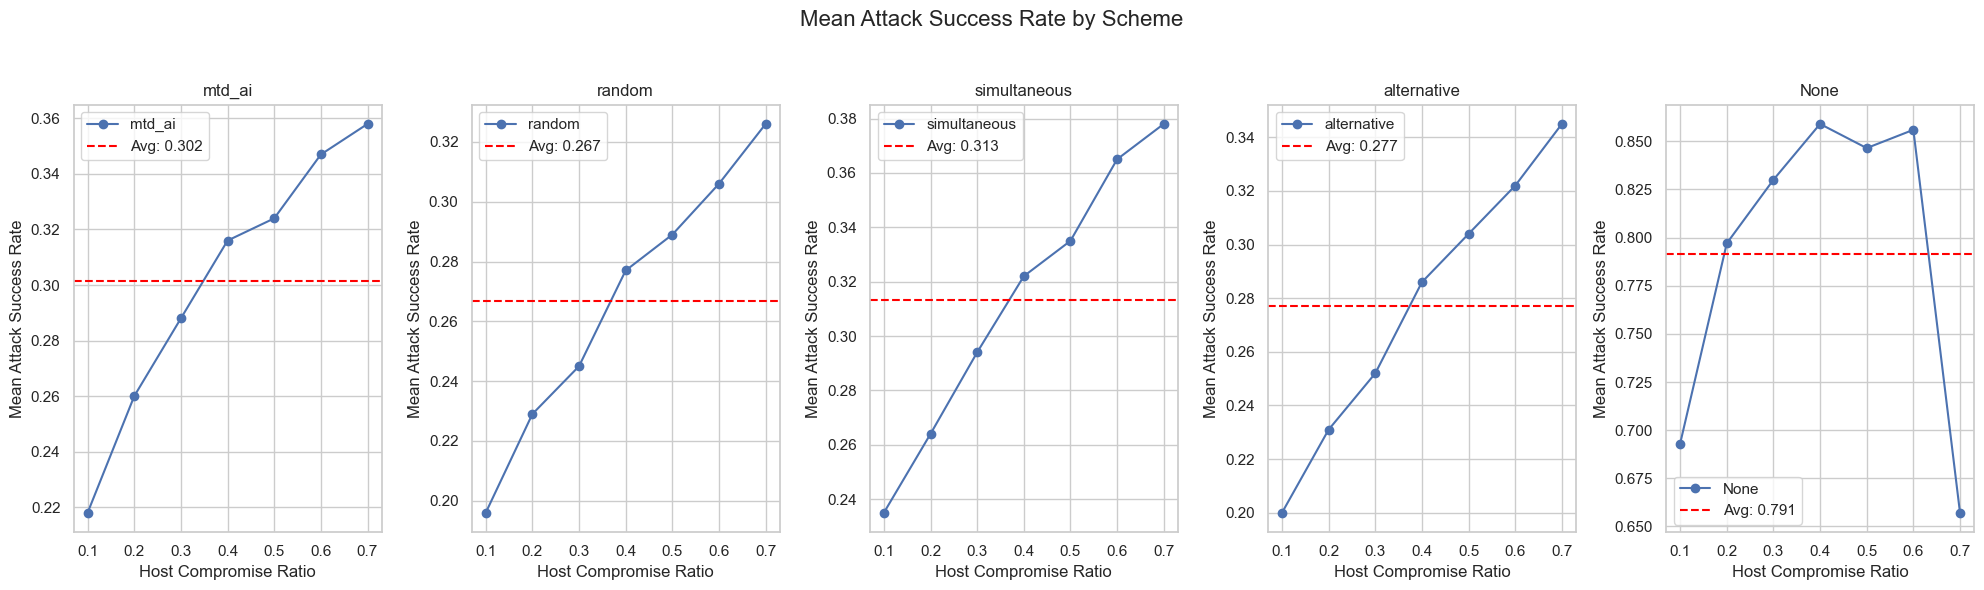

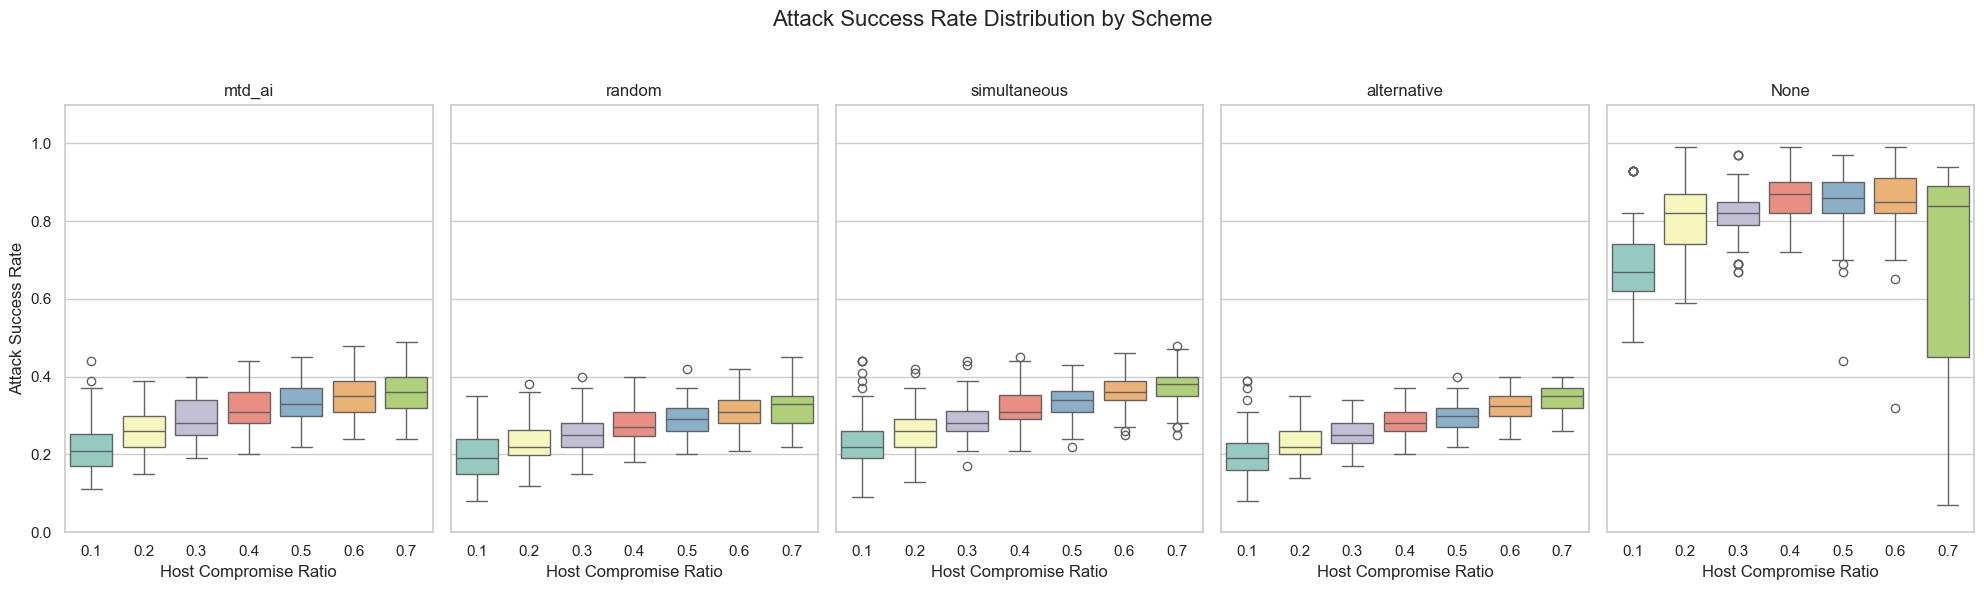

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

scheme = ["mtd_ai", "random", "simultaneous", "alternative", "None"]

fig, axes = plt.subplots(1, len(scheme), figsize=(20, 8))

# Iterate through each scheme and create subplots
for i, scheme_name in enumerate(scheme):
    # Prepare data for heatmap
    attack_success_data = []
    
    for sim in compromiseCheckpointSchemes[i]:
        attack_success_rates = [round(entry['attack_success_rate'], 1) for entry in sim]  # Round to 1 decimal place
        attack_success_data.append(attack_success_rates)
    
    # Convert to DataFrame for seaborn heatmap
    df_attack_success = pd.DataFrame(attack_success_data, columns=[f"{round(ratio, 1)}" for ratio in np.arange(0.1, 0.8, 0.1)])
    
    # Plot heatmap in subplots
    sns.heatmap(df_attack_success, cmap="coolwarm", annot=False, cbar=True, ax=axes[i])
    axes[i].set_title(f"{scheme_name}")
    axes[i].set_xlabel("Host Compromise Ratio")
    axes[i].set_ylabel("Simulation Number")

# Set the main title for the entire figure
fig.suptitle("Attack Success Rates Heatmap for Different Schemes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig, axes = plt.subplots(1, len(scheme), figsize=(20, 6))

# Iterate through each scheme
for i, scheme_name in enumerate(scheme):
    # Prepare data for mean calculation
    attack_success_data = []
    
    for sim in compromiseCheckpointSchemes[i]:
        attack_success_rates = [round(entry['attack_success_rate'], 1) for entry in sim]
        attack_success_data.append(attack_success_rates)
    
    # Convert to DataFrame and round the compromise ratios
    df_attack_success = pd.DataFrame(attack_success_data, columns=[f"{round(ratio, 1)}" for ratio in np.arange(0.1, 0.8, 0.1)])
    
    # Calculate mean attack success rate at each compromise ratio
    mean_attack_success = df_attack_success.mean(axis=0)
    
    # Plot mean line
    axes[i].plot(mean_attack_success.index, mean_attack_success.values, marker='o', linestyle='-', label=scheme_name)
    axes[i].set_title(f"{scheme_name}")
    axes[i].set_xlabel("Host Compromise Ratio")
    axes[i].set_ylabel("Mean Attack Success Rate")
    axes[i].grid(True)
    
    # Add mean line
    avg_value = mean_attack_success.mean()
    axes[i].axhline(y=avg_value, color='red', linestyle='--', label=f"Avg: {round(avg_value, 3)}")
    axes[i].legend()

# Set the main title for the entire figure
fig.suptitle("Mean Attack Success Rate by Scheme", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


fig, axes = plt.subplots(1, len(scheme), figsize=(20, 6), sharey=True)

# Iterate through each scheme
for i, scheme_name in enumerate(scheme):
    # Prepare data for boxplot
    attack_success_data = []
    
    for sim in compromiseCheckpointSchemes[i]:
        attack_success_rates = [round(entry['attack_success_rate'], 2) for entry in sim]  # Rounding for clarity
        attack_success_data.append(attack_success_rates)
    
    # Convert to DataFrame and round compromise ratios
    df_attack_success = pd.DataFrame(attack_success_data, columns=[f"{round(ratio, 1)}" for ratio in np.arange(0.1, 0.8, 0.1)])
    
    # Create boxplot with outlier management
    sns.boxplot(data=df_attack_success, ax=axes[i], palette="Set3", showfliers=True)  # showfliers=True for displaying outliers
    
    # Adjust the y-axis for more range (adjust based on your dataset)
    axes[i].set_ylim(0, 1.1)  # Allow some space above 1 for better visibility
    
    axes[i].set_title(f"{scheme_name}")
    axes[i].set_xlabel("Host Compromise Ratio")
    
    # Set the y-axis label only for the first subplot
    if i == 0:
        axes[i].set_ylabel("Attack Success Rate")

# Set the main title for the entire figure
fig.suptitle("Attack Success Rate Distribution by Scheme", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

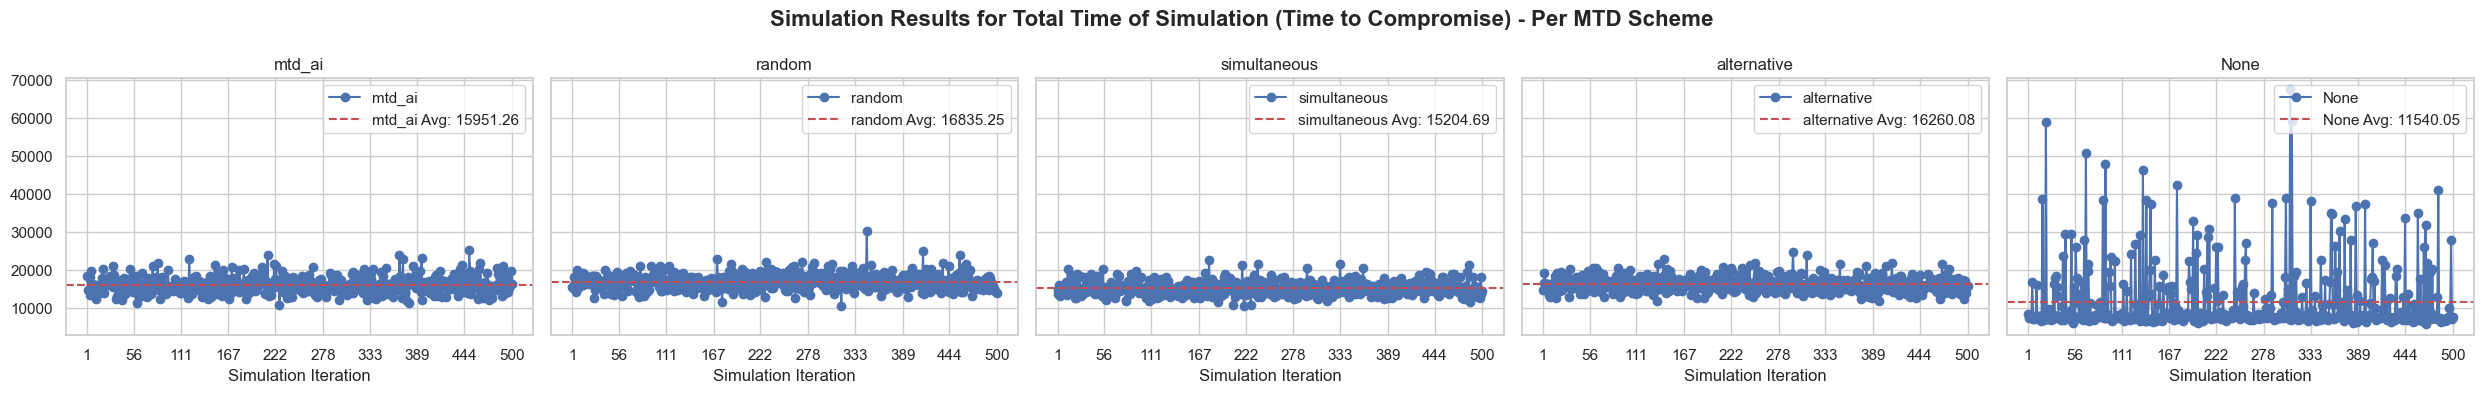

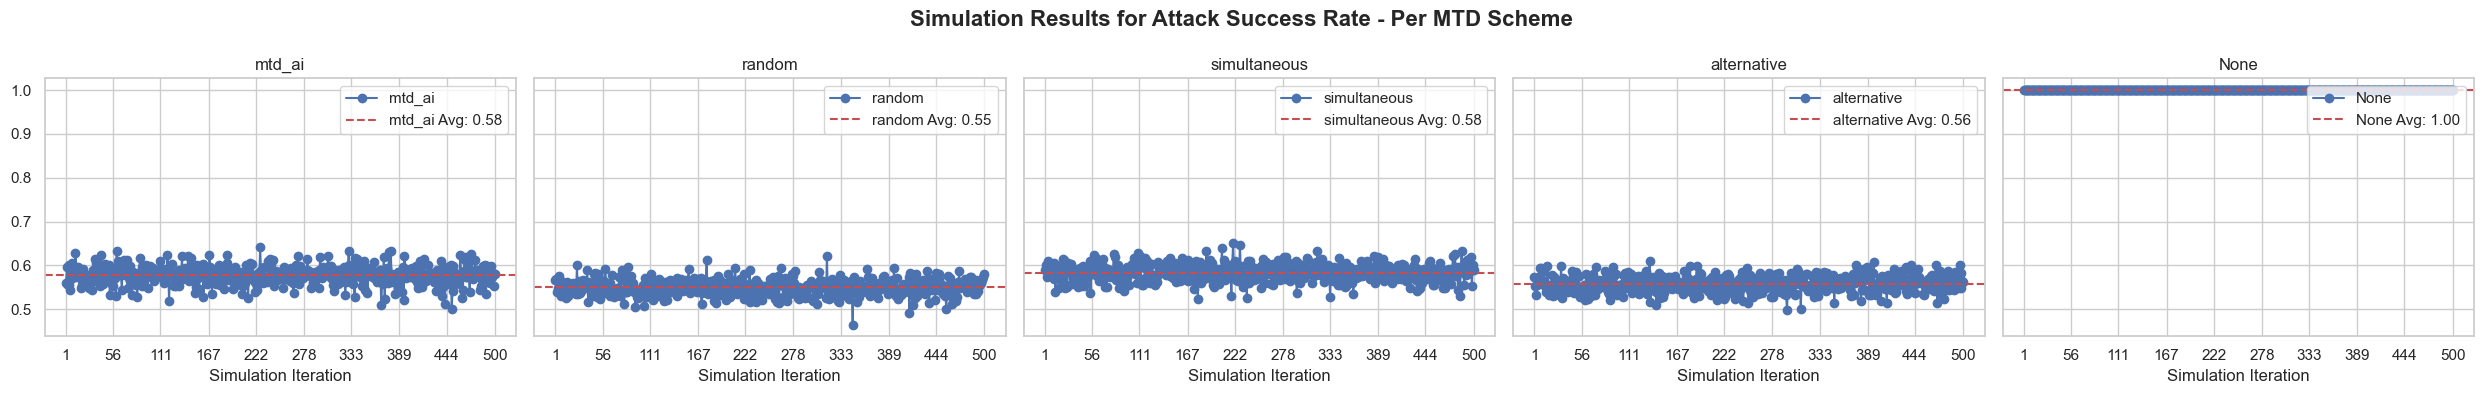

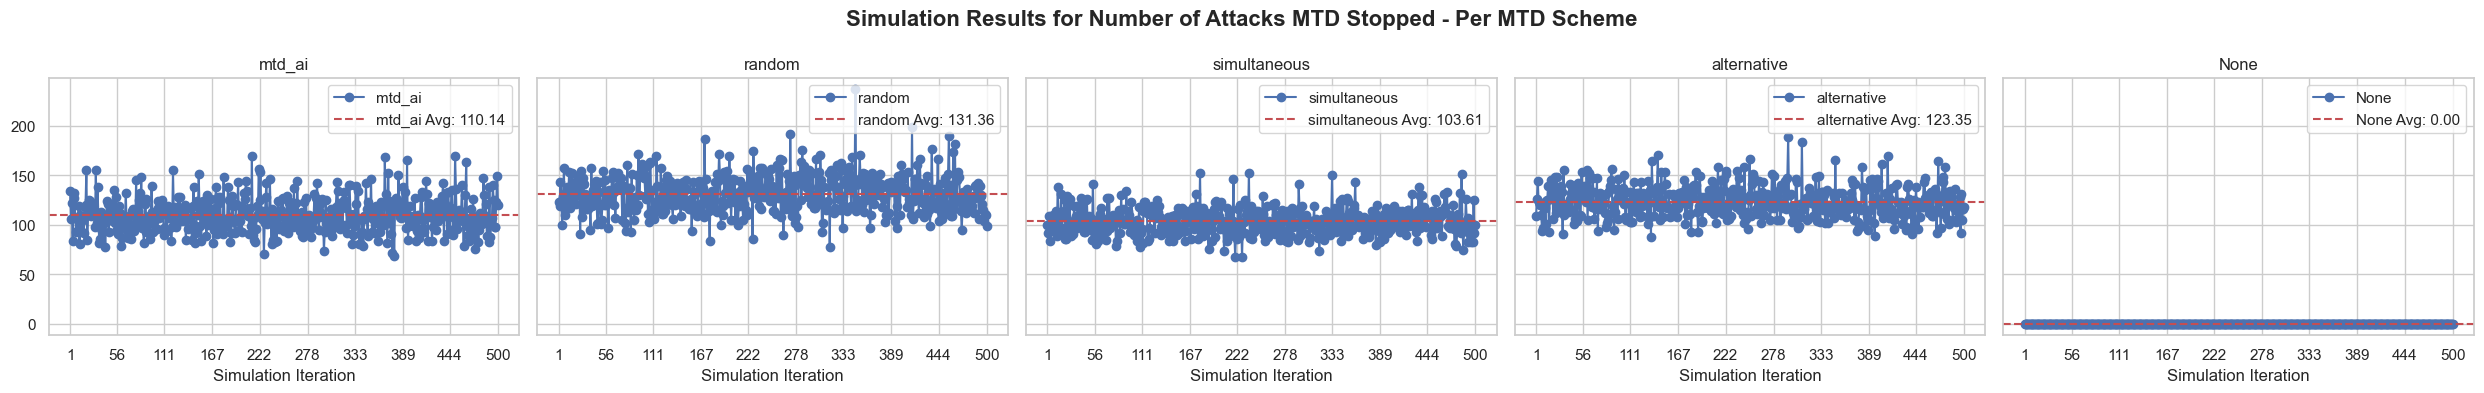

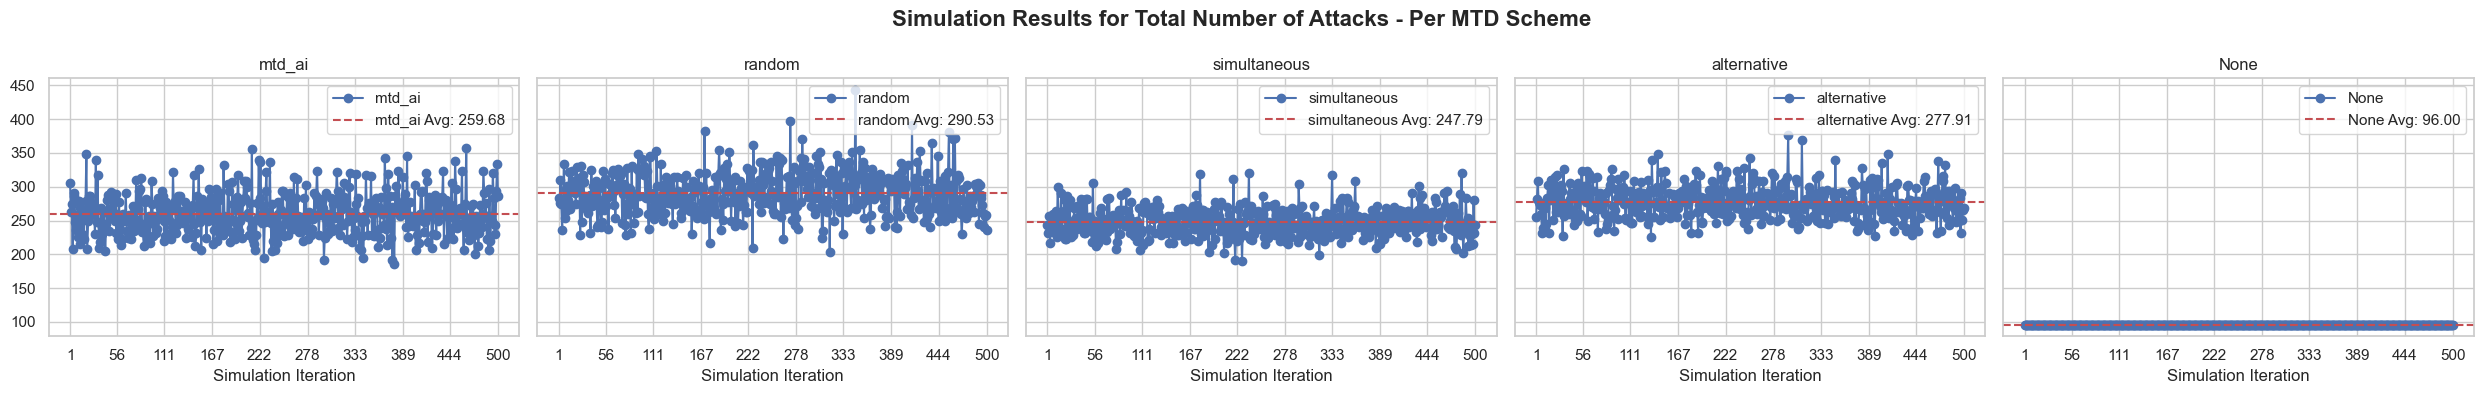

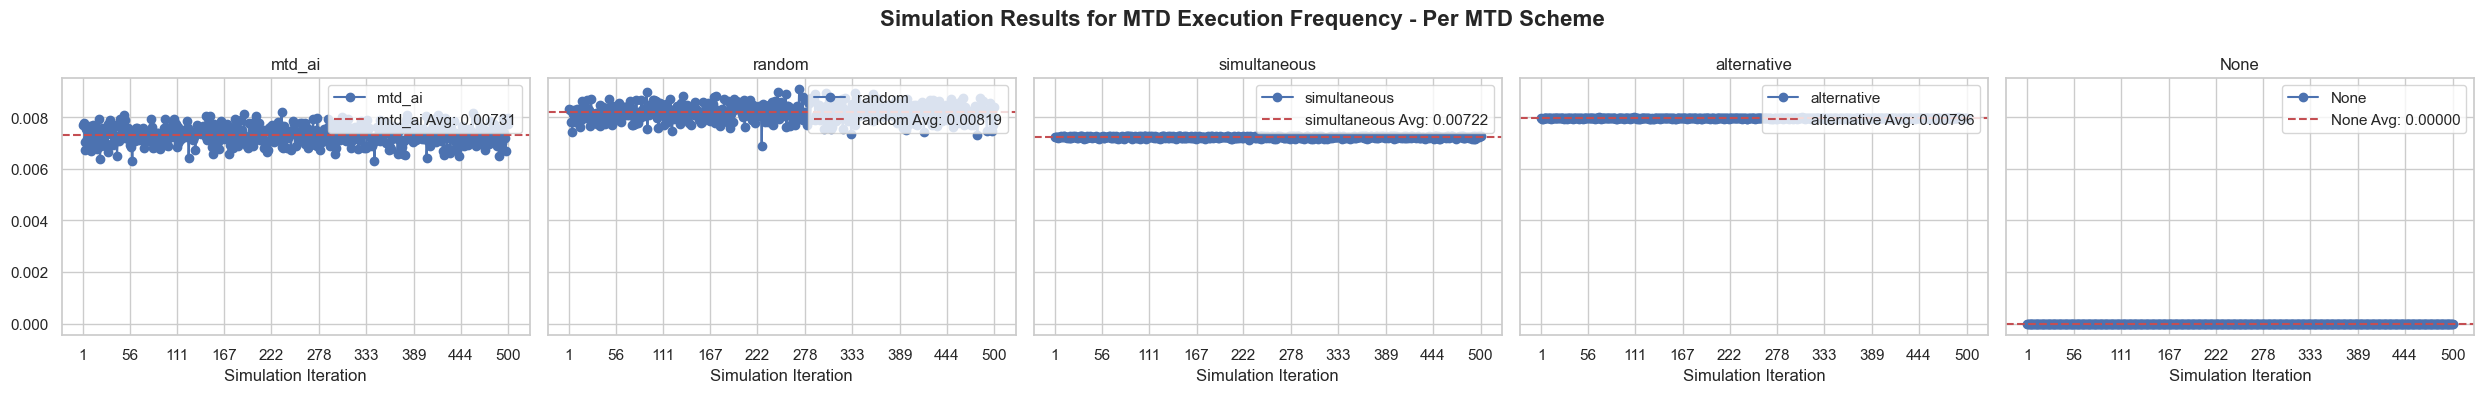

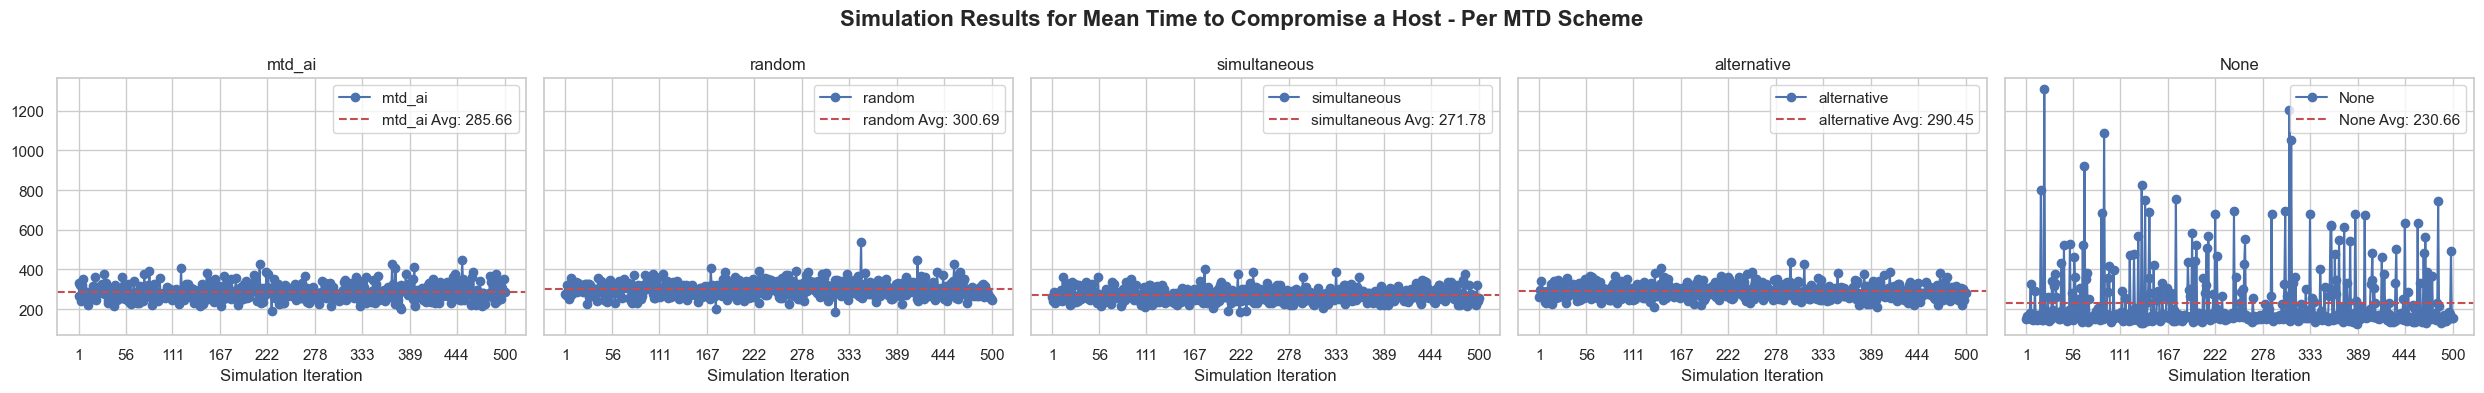

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

scheme = ["mtd_ai", "random", "simultaneous", "alternative", "None"]
# Setup the style
sns.set(style="whitegrid")

# Assumed num_iterations might vary, define it as needed

# Get number of schemes
num_schemes = len(scheme)


# Define the ticks for the x-axis
x_ticks = np.linspace(1, num_iterations, min(10, num_iterations), dtype=int)

# Iterate over each metric to create a separate figure for each
metrics = ['Total Time of Simulation (Time to Compromise)', 'Attack Success Rate', 'Number of Attacks MTD Stopped', 'Total Number of Attacks', 'MTD Execution Frequency', 'Mean Time to Compromise']

for metric in metrics:
    fig, axes = plt.subplots(1, num_schemes, figsize=(5 * num_schemes, 4), sharey='row')
    if metric == 'Mean Time to Compromise':
        fig.suptitle(f'Simulation Results for {metric} a Host - Per MTD Scheme', fontsize=16, weight='bold')
    else:
        fig.suptitle(f'Simulation Results for {metric} - Per MTD Scheme', fontsize=16, weight='bold')

    # Plot each scheme's results in a subplot
    for i, results in enumerate(resultsPerScheme):
        # Convert the list of dictionaries to a DataFrame
        df = pd.DataFrame(results)
        
        # Ensure that the number of data points matches num_iterations
        if len(df[metric]) == num_iterations:
            axes[i].plot(range(1, num_iterations + 1), df[metric], marker='o', label=scheme[i])
            
            # Add the mean line
            avg_value = df[metric].mean()
            if metric == 'MTD Execution Frequency':
                axes[i].axhline(y=avg_value, color='r', linestyle='--', label=f'{scheme[i]} Avg: {avg_value:.5f}')
            else:
                axes[i].axhline(y=avg_value, color='r', linestyle='--', label=f'{scheme[i]} Avg: {avg_value:.2f}')

            
            # Label the axes and title
            axes[i].set_title(scheme[i])
            axes[i].set_xlabel('Simulation Iteration')
            
            # Set the x-ticks adaptively
            axes[i].set_xticks(x_ticks)
            axes[i].legend(loc='upper right')
        else:
            print(f"Skipping {scheme[i]} for metric {metric} due to mismatched lengths.")
            continue

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(f'{metric.replace(" ", "_").lower()}.png')  # Saving the figure as a PNG file
    plt.show()

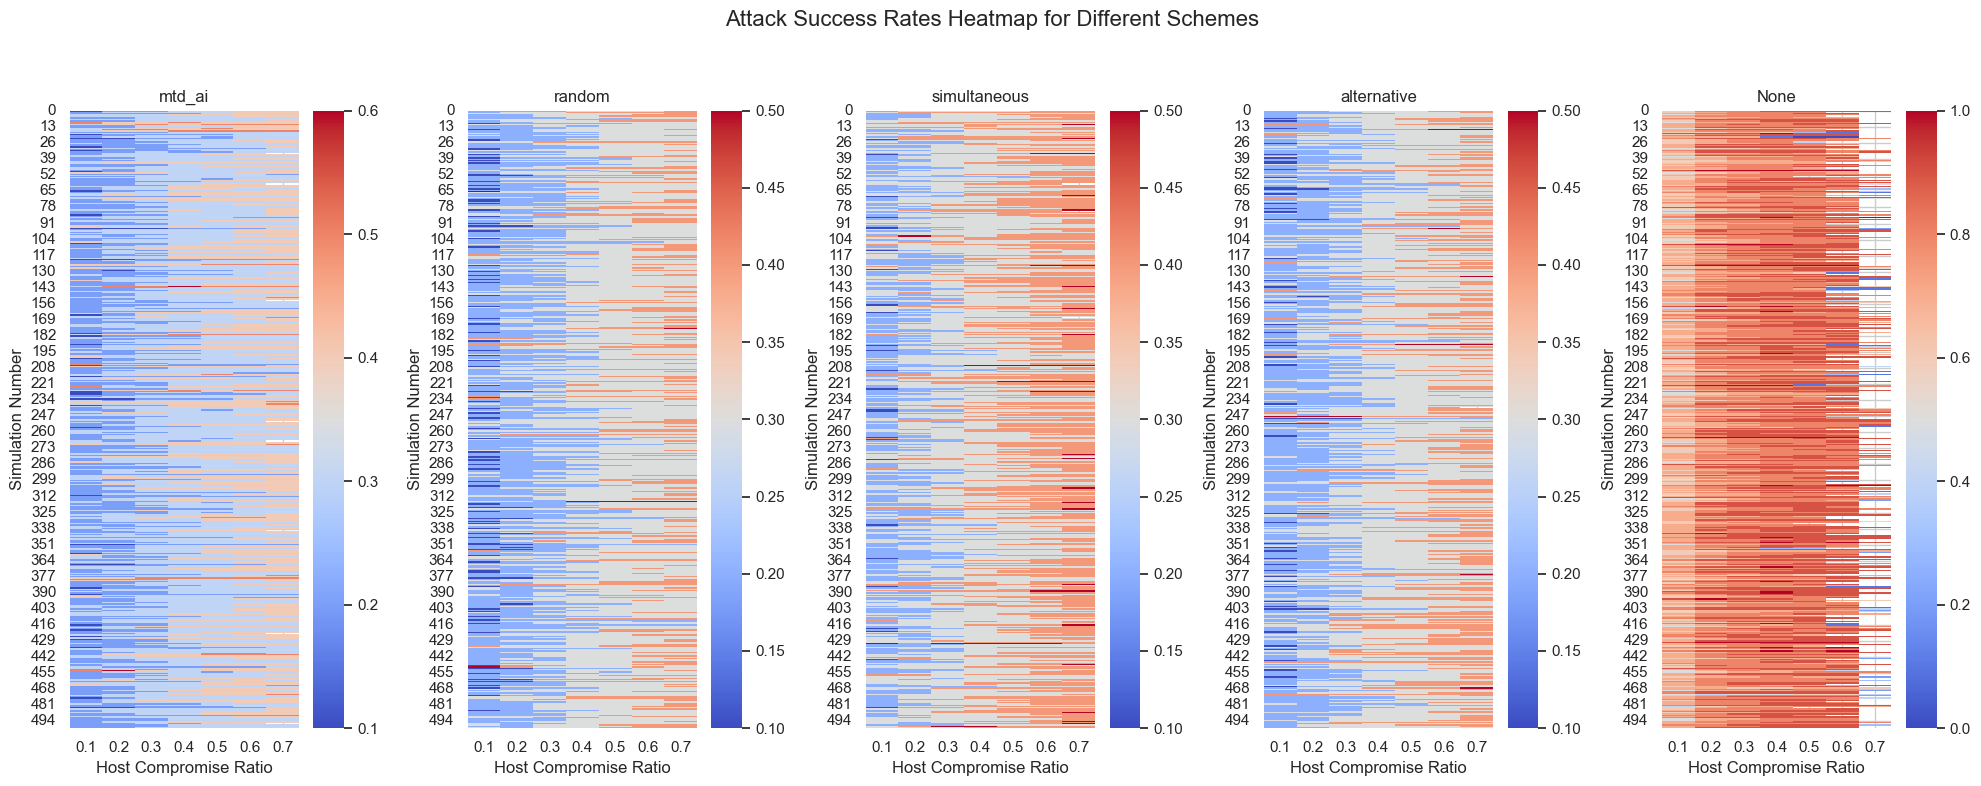

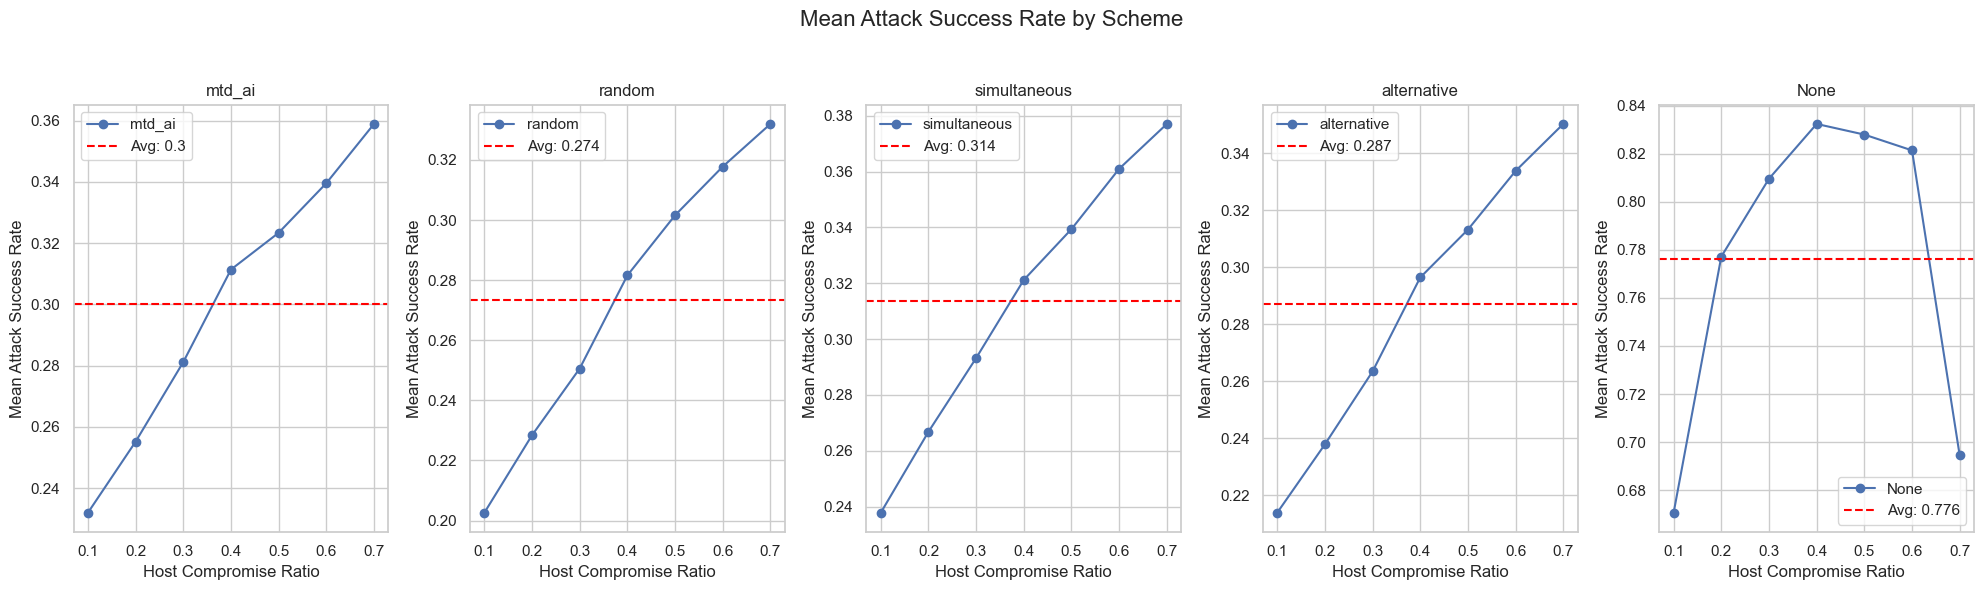

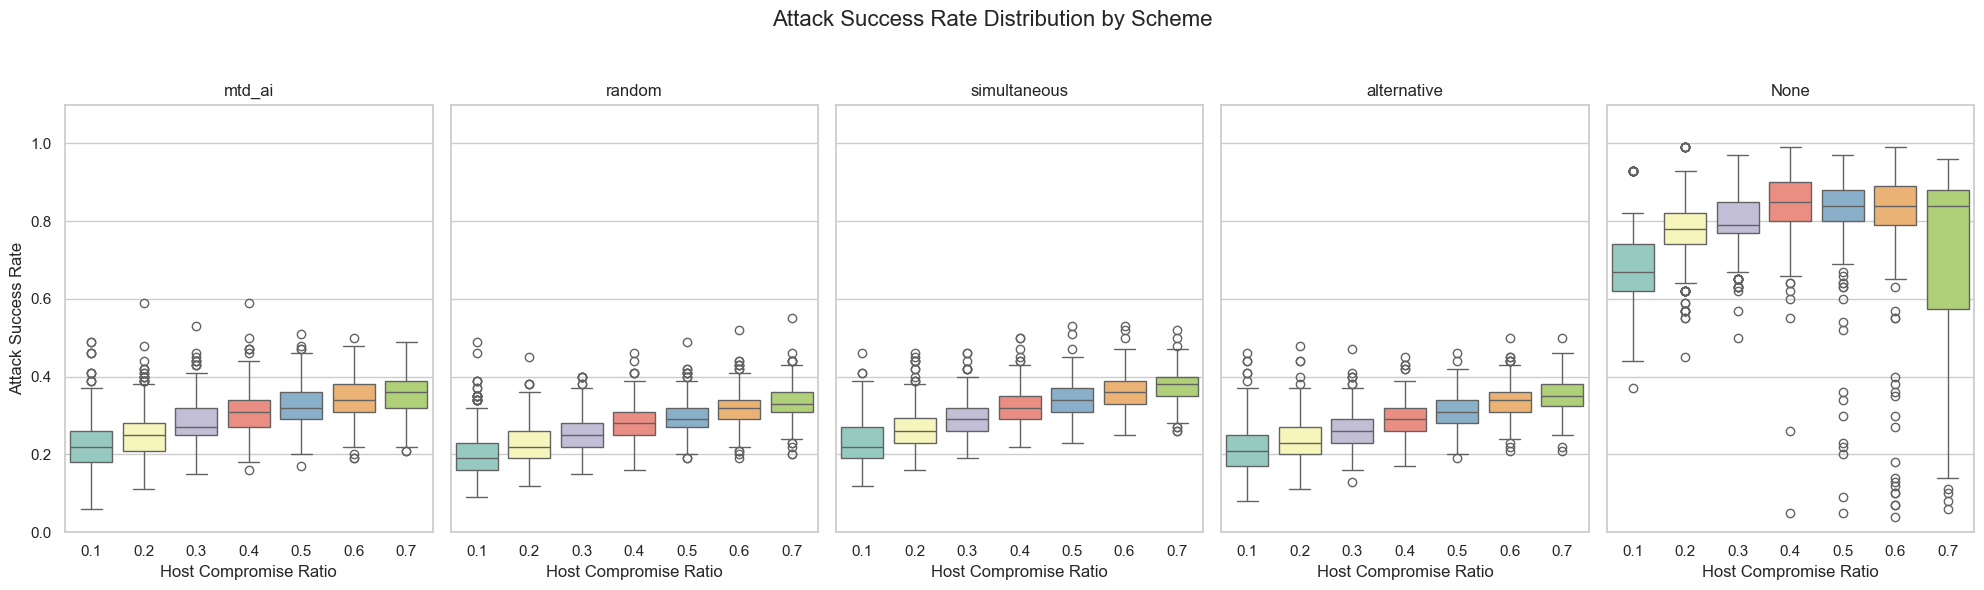

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

scheme = ["mtd_ai", "random", "simultaneous", "alternative", "None"]

fig, axes = plt.subplots(1, len(scheme), figsize=(20, 8))

# Iterate through each scheme and create subplots
for i, scheme_name in enumerate(scheme):
    # Prepare data for heatmap
    attack_success_data = []
    
    for sim in compromiseCheckpointSchemes[i]:
        attack_success_rates = [round(entry['attack_success_rate'], 1) for entry in sim]  # Round to 1 decimal place
        attack_success_data.append(attack_success_rates)
    
    # Convert to DataFrame for seaborn heatmap
    df_attack_success = pd.DataFrame(attack_success_data, columns=[f"{round(ratio, 1)}" for ratio in np.arange(0.1, 0.8, 0.1)])
    
    # Plot heatmap in subplots
    sns.heatmap(df_attack_success, cmap="coolwarm", annot=False, cbar=True, ax=axes[i])
    axes[i].set_title(f"{scheme_name}")
    axes[i].set_xlabel("Host Compromise Ratio")
    axes[i].set_ylabel("Simulation Number")

# Set the main title for the entire figure
fig.suptitle("Attack Success Rates Heatmap for Different Schemes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig, axes = plt.subplots(1, len(scheme), figsize=(20, 6))

# Iterate through each scheme
for i, scheme_name in enumerate(scheme):
    # Prepare data for mean calculation
    attack_success_data = []
    
    for sim in compromiseCheckpointSchemes[i]:
        attack_success_rates = [round(entry['attack_success_rate'], 1) for entry in sim]
        attack_success_data.append(attack_success_rates)
    
    # Convert to DataFrame and round the compromise ratios
    df_attack_success = pd.DataFrame(attack_success_data, columns=[f"{round(ratio, 1)}" for ratio in np.arange(0.1, 0.8, 0.1)])
    
    # Calculate mean attack success rate at each compromise ratio
    mean_attack_success = df_attack_success.mean(axis=0)
    
    # Plot mean line
    axes[i].plot(mean_attack_success.index, mean_attack_success.values, marker='o', linestyle='-', label=scheme_name)
    axes[i].set_title(f"{scheme_name}")
    axes[i].set_xlabel("Host Compromise Ratio")
    axes[i].set_ylabel("Mean Attack Success Rate")
    axes[i].grid(True)
    
    # Add mean line
    avg_value = mean_attack_success.mean()
    axes[i].axhline(y=avg_value, color='red', linestyle='--', label=f"Avg: {round(avg_value, 3)}")
    axes[i].legend()

# Set the main title for the entire figure
fig.suptitle("Mean Attack Success Rate by Scheme", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


fig, axes = plt.subplots(1, len(scheme), figsize=(20, 6), sharey=True)

# Iterate through each scheme
for i, scheme_name in enumerate(scheme):
    # Prepare data for boxplot
    attack_success_data = []
    
    for sim in compromiseCheckpointSchemes[i]:
        attack_success_rates = [round(entry['attack_success_rate'], 2) for entry in sim]  # Rounding for clarity
        attack_success_data.append(attack_success_rates)
    
    # Convert to DataFrame and round compromise ratios
    df_attack_success = pd.DataFrame(attack_success_data, columns=[f"{round(ratio, 1)}" for ratio in np.arange(0.1, 0.8, 0.1)])
    
    # Create boxplot with outlier management
    sns.boxplot(data=df_attack_success, ax=axes[i], palette="Set3", showfliers=True)  # showfliers=True for displaying outliers
    
    # Adjust the y-axis for more range (adjust based on your dataset)
    axes[i].set_ylim(0, 1.1)  # Allow some space above 1 for better visibility
    
    axes[i].set_title(f"{scheme_name}")
    axes[i].set_xlabel("Host Compromise Ratio")
    
    # Set the y-axis label only for the first subplot
    if i == 0:
        axes[i].set_ylabel("Attack Success Rate")

# Set the main title for the entire figure
fig.suptitle("Attack Success Rate Distribution by Scheme", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()